# Señales y Sistemas Discretos

### Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Funcion para generar un escalon unitario discreto u[n-a]
def unit_step(a, n):
    unit =[]
    for sample in n:
        if sample<a:
            unit.append(0)
        else:
            unit.append(1)
    return(unit)

## DTFT de senales discretas

### Ejemplo #1

Suponga una senal definida como: $ x[n] = u[n + (Lx-1)/2] - u[n - (Lx+1)/2] $

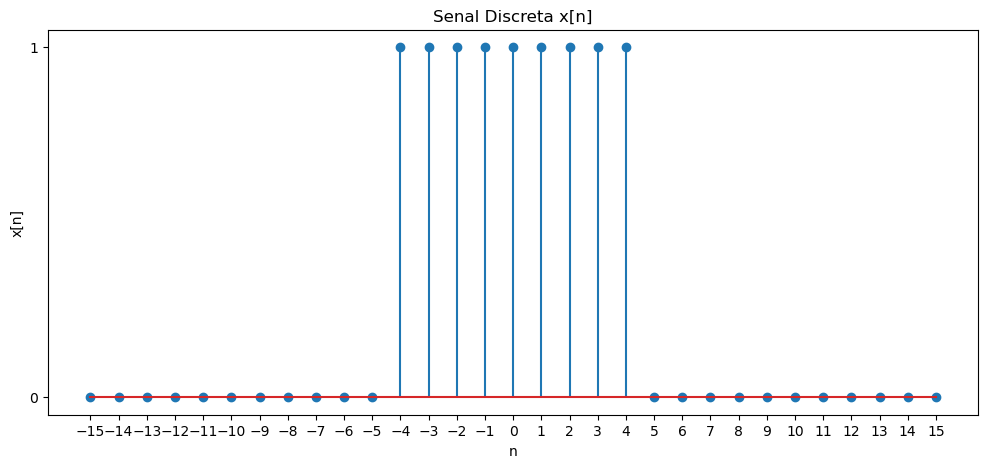

In [69]:
# Escalon unitario u[n-a]
a = 0 # Enter delay or advance
Lx = 9

#eje de las muestras
UL = 16
LL = -15
n = np.arange(LL, UL, 1)

# se contruye la senal a partir de escalones unitarios
x =  np.array(unit_step(-(Lx-1)/2, n)) - np.array(unit_step((Lx+1)/2, n)) 

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
ax.stem(n, x)
ax.set_xlabel('n')
ax.set_xticks(np.arange(LL, UL, 1))
ax.set_yticks([0, 1])
ax.set_ylabel('x[n]')
ax.set_title('Senal Discreta x[n]')

plt.show()

Analiticamente podemos ver que su DTFT sera de la forma:

$ X(\Omega) = sin(Lx*\Omega/2)/sin(\Omega/2) $

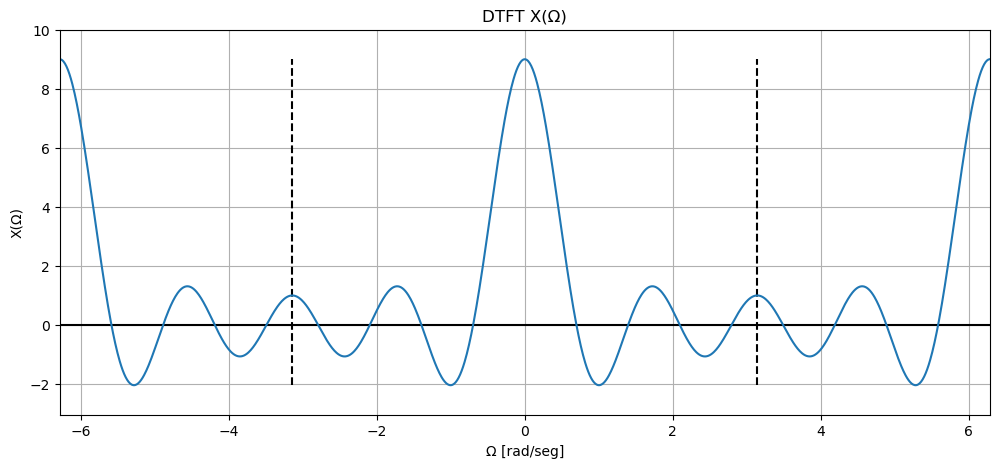

In [56]:
# DTFT obtenida analiticamente
minOmega = -2*np.pi
maxOmega = 2*np.pi
Omega = np.arange(minOmega, maxOmega, 0.01)
X = np.sin(Lx*Omega/2)/np.sin(Omega/2)

fig2, ax2 = plt.subplots()
fig2.set_size_inches(12, 5)

ax2.hlines(0,minOmega,maxOmega, colors='k')
ax2.vlines(-np.pi,X.min(), X.max(), colors='k', linestyles="dashed")
ax2.vlines(np.pi,X.min(), X.max(), colors='k', linestyles="dashed")
ax2.plot(Omega, X)
ax2.set_xlabel('\u03A9 [rad/seg]')
#ax2.set_xticks(np.arange(LL, UL, 1))
#ax2.set_yticks([0, 1])
ax2.set_ylabel('X(\u03A9)')
ax2.set_title('DTFT X(\u03A9)')
ax2.set_xlim([minOmega,maxOmega])
ax2.set_ylim([X.min()-1,X.max()+1])
ax2.grid()

Si graficamos por separado el Modulo y la Fase de $X(\Omega)$

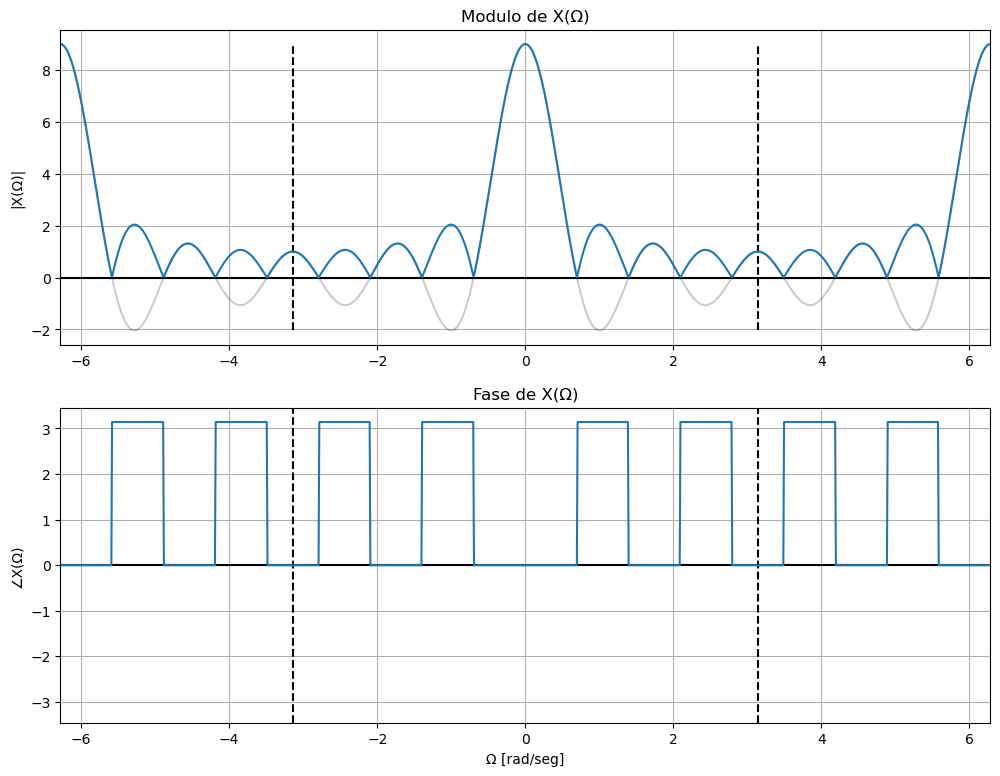

In [57]:
fig3, ax3 = plt.subplots(2,1)
fig3.set_size_inches(12, 9)

ax3[0].hlines(0,minOmega,maxOmega, colors='k')
ax3[0].vlines(-np.pi,X.min(), X.max(), colors='k', linestyles="dashed")
ax3[0].vlines(np.pi,X.min(), X.max(), colors='k', linestyles="dashed")
ax3[0].plot(Omega, X, alpha=0.2, color = 'k')
ax3[0].plot(Omega, np.abs(X))
ax3[0].set_xlabel(' ')
ax3[0].set_ylabel('|X(\u03A9)|')
ax3[0].set_title('Modulo de X(\u03A9)')
ax3[0].set_xlim([minOmega,maxOmega])
ax3[0].grid()

ax3[1].hlines(0,minOmega,maxOmega, colors='k')
ax3[1].vlines(-np.pi,-(np.pi+np.pi/10), (np.pi+np.pi/10), colors='k', linestyles="dashed")
ax3[1].vlines(np.pi,-(np.pi+np.pi/10), (np.pi+np.pi/10), colors='k', linestyles="dashed")
ax3[1].plot(Omega, np.angle(X))
ax3[1].set_xlabel('\u03A9 [rad/seg]')
ax3[1].set_ylabel('\u2220X(\u03A9)')
ax3[1].set_title('Fase de X(\u03A9)')
ax3[1].set_xlim([minOmega,maxOmega])
ax3[1].set_ylim([-(np.pi+np.pi/10),(np.pi+np.pi/10)])
ax3[1].grid()

### Ejemplo #2

Suponga una senal definida como: $ x[n] = \gamma^n*u[n]  $

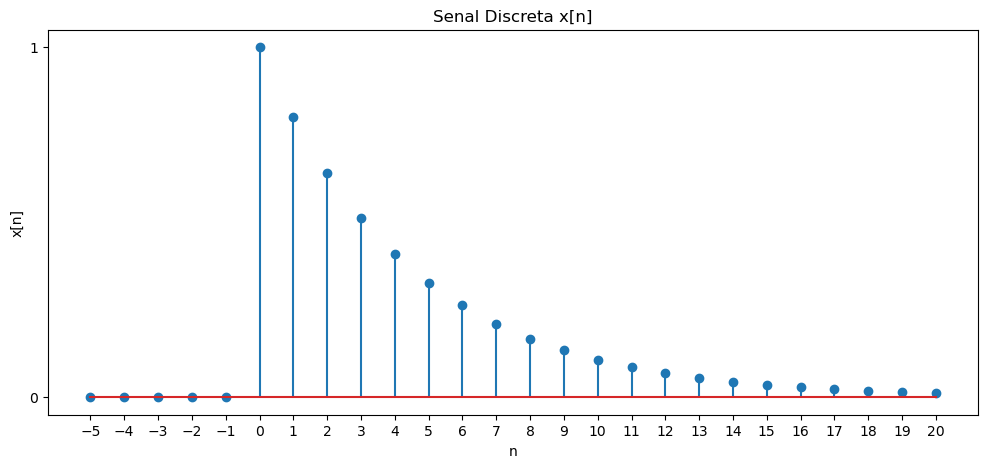

In [83]:
#eje de las muestras
UL = 21
LL = -5
n = np.arange(LL, UL, 1)

gamma = 0.8

# se contruye la senal a partir de escalones unitarios
x = (gamma**n)*unit_step(0,n)

fig4, ax4 = plt.subplots()
fig4.set_size_inches(12, 5)
ax4.stem(n, x)
ax4.set_xlabel('n')
ax4.set_xticks(np.arange(LL, UL, 1))
ax4.set_yticks([0, 1])
ax4.set_ylabel('x[n]')
ax4.set_title('Senal Discreta x[n]')

plt.show()

Analiticamente podemos ver que su DTFT sera de la forma:

$ X(\Omega) = \frac{1}{1 - \gamma*cos(\Omega) + j*\gamma*sin(\Omega)}  $

$ X(\Omega) = 1/(1 - \gamma*cos(\Omega) + j*\gamma*sin(\Omega)) $

In [84]:
# DTFT obtenida analiticamente
minOmega = -2*np.pi
maxOmega = 2*np.pi
Omega = np.arange(minOmega, maxOmega, 0.01)
X = 1/(1 - gamma*np.cos(Omega) + 1j*gamma*np.sin(Omega)) 

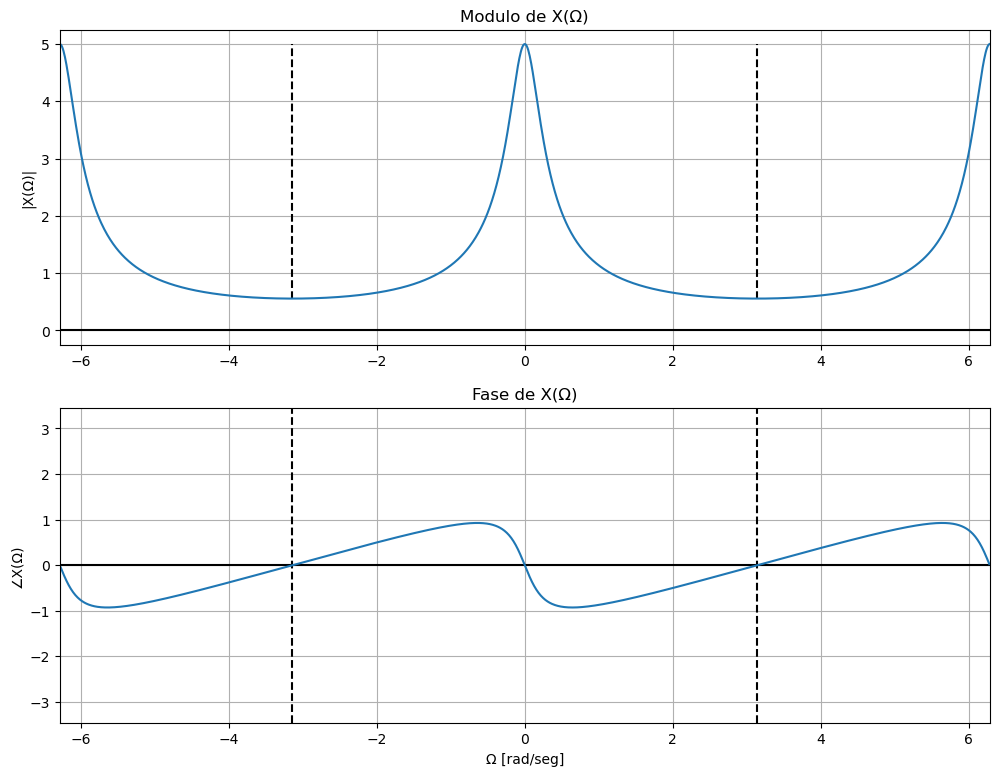

In [85]:
fig4, ax4 = plt.subplots(2,1)
fig4.set_size_inches(12, 9)

ax4[0].hlines(0,minOmega,maxOmega, colors='k')
ax4[0].vlines(-np.pi,X.min(), X.max(), colors='k', linestyles="dashed")
ax4[0].vlines(np.pi,X.min(), X.max(), colors='k', linestyles="dashed")
ax4[0].plot(Omega, np.abs(X))
ax4[0].set_xlabel(' ')
ax4[0].set_ylabel('|X(\u03A9)|')
ax4[0].set_title('Modulo de X(\u03A9)')
ax4[0].set_xlim([minOmega,maxOmega])
ax4[0].grid()

ax4[1].hlines(0,minOmega,maxOmega, colors='k')
ax4[1].vlines(-np.pi,-(np.pi+np.pi/10), (np.pi+np.pi/10), colors='k', linestyles="dashed")
ax4[1].vlines(np.pi,-(np.pi+np.pi/10), (np.pi+np.pi/10), colors='k', linestyles="dashed")
ax4[1].plot(Omega, np.angle(X))
ax4[1].set_xlabel('\u03A9 [rad/seg]')
ax4[1].set_ylabel('\u2220X(\u03A9)')
ax4[1].set_title('Fase de X(\u03A9)')
ax4[1].set_xlim([minOmega,maxOmega])
ax4[1].set_ylim([-(np.pi+np.pi/10),(np.pi+np.pi/10)])
ax4[1].grid()

### Ejemplo #3

Suponga un sistema digital de promedio movil, que toma la muestra actual y la L-1 muestras anteriores, y devuelve el promedio.

Su ecuacion en diferencias sera:  $ y[n] = 1/L * \sum_{k=0}^{L-1} x[n - k] $

La respuesta al impulso:  $ h[n] = 1/L * \sum_{k=0}^{L-1} \delta[n - k] $ 

Y finalmente su DTFT:  $ H(\Omega) = \frac{1}{L} * \frac{1 - e^{-j\Omega L}}{1 - e^{-j\Omega}} $


In [78]:
# DTFT obtenida analiticamente
minOmega = -np.pi
maxOmega = np.pi
Omega = np.arange(minOmega, maxOmega, 0.01)

# Orden del promediador
L = 15

H = (1 - np.exp(-1j*Omega*L))/(1 - np.exp(-1j*Omega))

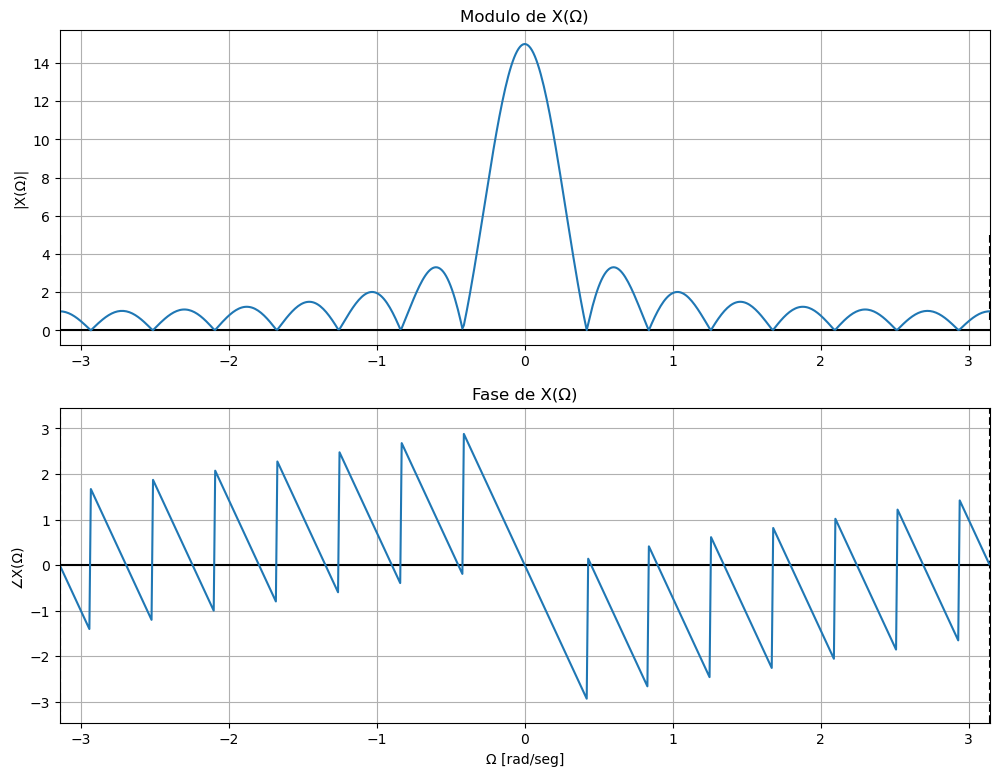

In [79]:
fig5, ax5 = plt.subplots(2,1)
fig5.set_size_inches(12, 9)

ax5[0].hlines(0,minOmega,maxOmega, colors='k')
ax5[0].vlines(-np.pi,X.min(), X.max(), colors='k', linestyles="dashed")
ax5[0].vlines(np.pi,X.min(), X.max(), colors='k', linestyles="dashed")
ax5[0].plot(Omega, np.abs(H))
ax5[0].set_xlabel(' ')
ax5[0].set_ylabel('|X(\u03A9)|')
ax5[0].set_title('Modulo de X(\u03A9)')
ax5[0].set_xlim([minOmega,maxOmega])
ax5[0].grid()

ax5[1].hlines(0,minOmega,maxOmega, colors='k')
ax5[1].vlines(-np.pi,-(np.pi+np.pi/10), (np.pi+np.pi/10), colors='k', linestyles="dashed")
ax5[1].vlines(np.pi,-(np.pi+np.pi/10), (np.pi+np.pi/10), colors='k', linestyles="dashed")
ax5[1].plot(Omega, np.angle(H))
ax5[1].set_xlabel('\u03A9 [rad/seg]')
ax5[1].set_ylabel('\u2220X(\u03A9)')
ax5[1].set_title('Fase de X(\u03A9)')
ax5[1].set_xlim([minOmega,maxOmega])
ax5[1].set_ylim([-(np.pi+np.pi/10),(np.pi+np.pi/10)])
ax5[1].grid()

* Analice que sucede con distintos valores de L